<h2>Project Explore Weather trends</h2>
<ul>
    <li>3 data files (city_data, city_list, global_data)</li>
 </ul>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
dfcd = pd.read_csv('data/city_data.csv')
dfcl = pd.read_csv('data/city_list.csv')
dfgd = pd.read_csv('data/global_data.csv')

In [23]:
def moving_average(df, window):
    
    avg_list = []
    for i in range(window, df.shape[0]):
        df.iloc[i,df.columns.get_loc('mov_avg')] = df.loc[:,'avg_temp'][i-window : i].mean()
    return df

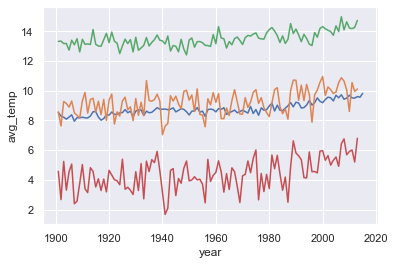

In [91]:
df_cities = dfcd[dfcd['city'].isin(['Berlin', 'Rome','Tokyo', 'Moscow', 'Melbourne', 'Toronto', 'Brasilia'])]
df_cities = df_cities[df_cities['year']>1900].fillna(0)
ax = sns.lineplot(x="year", y='avg_temp', data=dfgd[dfgd['year']>1900])
sns.lineplot(x="year",y='avg_temp', data =df_cities[df_cities['city']=='Berlin'])
sns.lineplot(x="year",y='avg_temp', data =df_cities[df_cities['city']=='Melbourne'])
sns.lineplot(x="year",y='avg_temp', data =df_cities[df_cities['city']=='Moscow'])

In [99]:
dfgd.set_index('year')
dfgd['year'].duplic

0

In [ ]:
fg